SIF3012 Computational Physics

Computer Assignment

Name: Daphne Tan Xin Yu

Matric Number: 22052824/1


The one-dimensional time-independent Schrödinger equation is given by:
\begin{aligned}
-\frac{\hbar^2}{2m}\frac{d^2\psi}{dx^2}+V(x)\psi=E\psi
\end{aligned}

The potential well is defined as:
\begin{aligned}
V(x)=\frac{\hbar^2}{2m}\alpha^2\lambda(\lambda-1)\left(\frac{1}{2}-\frac{1}{\cosh^2(\alpha x)}\right)
\end{aligned}

Given that the Linear Ordinary Differential Equation is: 
$$
u'' + p(x)u' + q(x)u = 0
$$

The general form of linear shooting method is also known as Sturm-Liouville problem:
\begin{aligned} -\left[p\left(x\right)u'\left(x\right)\right]'+q\left(x\right)u\left(x\right)=\lambda r\left(x\right)u\left(x\right)=0,\ 0<x<1 \end{aligned}

The Sturm-Liouville equation and the Schrödinger equation are closely related, thus Schrodinger equation in form ψ"(x) of can be expressed as:
\begin{aligned} \psi''\left(x\right)+\frac{2m}{\hbar^2}\left[E-V\left(x\right)\right]\psi\left(x\right)=0 \end{aligned}

From the information above, we found that $p\left(x\right)=1$, $q\left(x\right)=\frac{2m}{\hbar^2}\left[E-V\left(x\right)\right]$ and $r\left(x\right)=0$


First of all, we define all the variables and potential function.

In [177]:
import numpy as np
import matplotlib.pyplot as plt

# Given parameters
hbar = 1 
m = 1
alpha = 1
lambda_ = 4

# Potential function
def potential(x):
    return (hbar**2 / (2 * m)) * alpha**2 * lambda_ * (lambda_ - 1) * (0.5 - 1 / np.cosh(alpha * x)**2) 

The Schrodinger equation with this potential can be solved exactly with these eigenvalues:

$$E_n=\frac{ℏ^2}{2m} \alpha^2 [ \frac{\lambda(\lambda - 1)}{2}-(\lambda-1-n)^2 ]$$


In [178]:
# Function to compute eigenvalues
def eigenvalue(n):
    return (hbar**2 / (2 * m)) * alpha**2 * (0.5 * lambda_ * (lambda_ - 1) - (lambda_ - 1 - n)**2)

# Compute the eigenvalues until n = 5
n_values = np.arange(6)  # n = 0, 1, 2, ..., 5
eigenvalues = [eigenvalue(n) for n in n_values]

# Print the eigenvalues
for n, E in zip(n_values, eigenvalues):
    print(f"E_{n} = {E:.2f}")

E_0 = -1.50
E_1 = 1.00
E_2 = 2.50
E_3 = 3.00
E_4 = 2.50
E_5 = 1.00


Next, we use Bisection method to find left and right turning point.

In [179]:
# Bisection Method
def bisection_method(func, a, b, tol=1e-5, max_iter=100):
    if func(a) * func(b) >= 0:
        raise ValueError("The function must have different signs at a and b.") # To check if the function has different signs at a and b
    
    iterations = 0 # 
    while (b - a) / 2 > tol and iterations < max_iter:
        midpoint = (a + b) / 2
        if func(midpoint) == 0:
            return midpoint, iterations  # Root is found
        elif func(a) * func(midpoint) < 0:
            b = midpoint
        else:
            a = midpoint
        iterations += 1
    return (a + b) / 2, iterations # Return the root and number of iterations

# Energy level
E = 2.5

# Define the function for the Bisection Method to find turning points (roots)
def func_to_solve(x):
    return potential(x) - E

# Find left and right turning points 
left_root, left_iterations = bisection_method(func_to_solve, -5, -1)
right_root, right_iterations = bisection_method(func_to_solve, 1, 5)

# Print the results
print(f"Left Turning Point: {left_root:.4f}, Iterations: {left_iterations}")
print(f"Right Turning Point: {right_root:.4f}, Iterations: {right_iterations}")

Left Turning Point: -1.9141, Iterations: 18
Right Turning Point: 1.9141, Iterations: 18


After that, we plot the potential and the energy level. Label the graph as well.

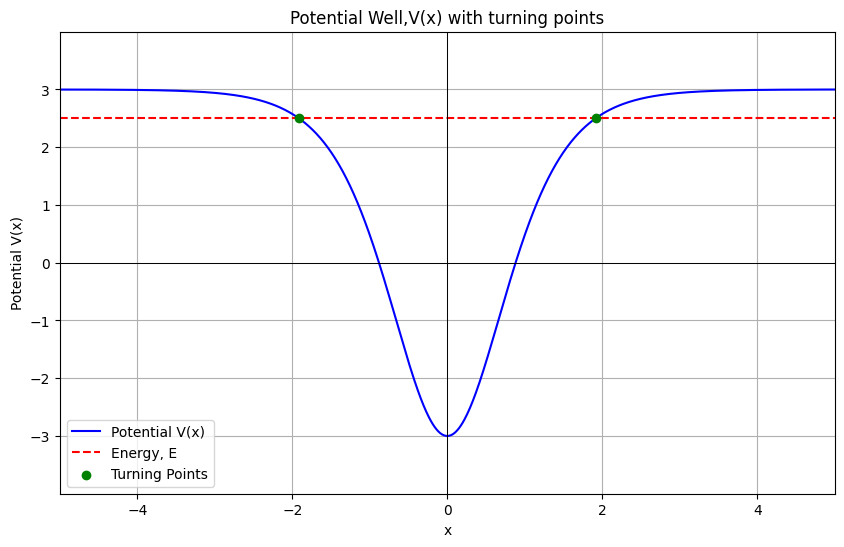

In [180]:
# Plot the potential and the energy level
x = np.linspace(-6, 6, 1000)
y = potential(x)

plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Potential V(x)', color='blue')
plt.axhline(y=E, color='red', linestyle='--', label='Energy, E')
plt.scatter([left_root, right_root], [E, E], color='green', zorder=5, label='Turning Points')

# Label the graph
plt.title('Potential Well,V(x) with turning points')
plt.xlabel('x')
plt.ylabel('Potential V(x)')
plt.axhline(0, color='black', lw=0.7)
plt.axvline(0, color='black', lw=0.7)
plt.xlim(-5, 5)
plt.ylim(min(y) - 1, max(y) + 1)
plt.grid()
plt.legend()
plt.show()

From the observation of the graph above, we can see that the roots are symmetrical.

Next, we draw the lines for the intersection points.

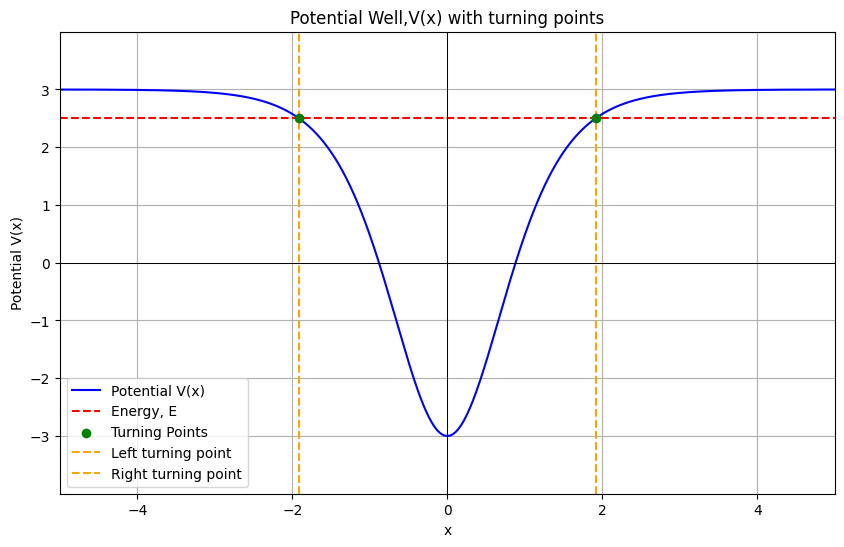

In [181]:
# Plot the potential and the energy level
x = np.linspace(-6, 6, 1000)
y = potential(x)

plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Potential V(x)', color='blue')
plt.axhline(y=E, color='red', linestyle='--', label='Energy, E')
plt.scatter([left_root, right_root], [E, E], color='green', zorder=5, label='Turning Points')


# Draw vertical lines at the intersection points
plt.axvline(left_root, color='orange', linestyle='--', label='Left turning point')
plt.axvline(right_root, color='orange', linestyle='--', label='Right turning point')

# Label the graph
plt.title('Potential Well,V(x) with turning points')
plt.xlabel('x')
plt.ylabel('Potential V(x)')
plt.axhline(0, color='black', lw=0.7)
plt.axvline(0, color='black', lw=0.7)
plt.xlim(-5, 5)
plt.ylim(min(y) - 1, max(y) + 1)
plt.grid()
plt.legend()
plt.show()

From the observation of the graph, we can see that the roots are symmetrical.

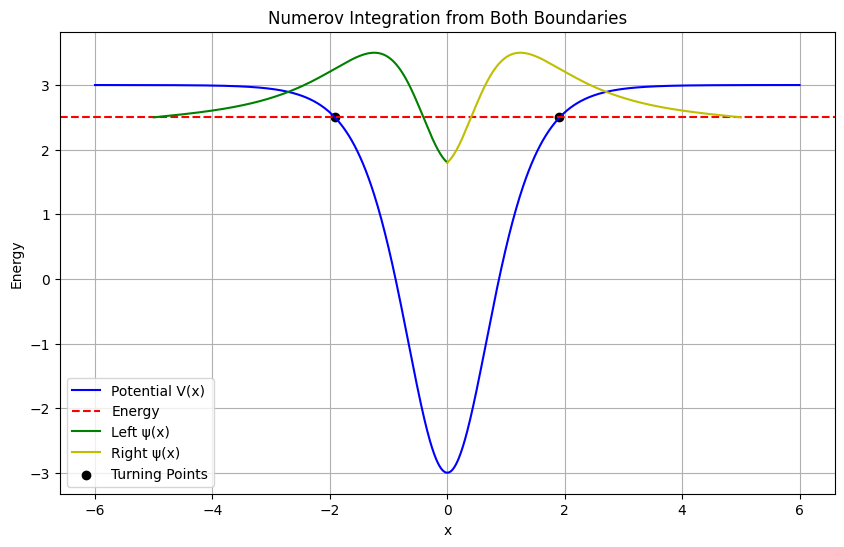

In [189]:
def numerov_step(psi_prev, psi_curr, x_prev, x_curr, x_next):
    h = x_next - x_curr  # Step size
    k_prev = g(x_prev)
    k_curr = g(x_curr)
    k_next = g(x_next)
    
    factor = 2 * (1 - 5/12 * h**2 * k_curr)
    term1 = (1 + 1/12 * h**2 * k_next) * psi_curr
    term2 = (1 + 1/12 * h**2 * k_prev) * psi_prev
    
    psi_next = (factor * term1 - term2) / (1 + h**2 * k_next / 12)
    return psi_next

def integrate_numerov(x_range, initial_psi, initial_psi_prime, direction=1):
    dx = direction * abs(x_range[1] - x_range[0])
    N = len(x_range)
    psi = np.zeros(N)
    
    # Initial conditions
    psi[0] = initial_psi
    psi[1] = initial_psi + initial_psi_prime * dx 
    
    # Numerov integration
    for i in range(1, N-1):
        psi[i+1] = numerov_step(psi[i-1], psi[i], 
                               x_range[i-1], x_range[i], x_range[i+1])
    
    return psi


left_tp, right_tp = turning_points[0], turning_points[1]
middle_point = (left_tp + right_tp) / 2

# Create mesh for left and right regions
x_left = np.linspace(-5, middle_point, 500)
x_right = np.linspace(5, middle_point, 500)

# Integrate from both sides
psi_left = integrate_numerov(x_left, 0, 0.1)
psi_right = integrate_numerov(x_right, 0, -0.1, direction=-1)

# Normalize wavefunctions
psi_left /= np.max(np.abs(psi_left))
psi_right /= np.max(np.abs(psi_right))

# Plot results
plt.figure(figsize=(10,6))
plt.plot(x, V, 'b-', label='Potential V(x)')
plt.axhline(y=E, color='r', linestyle='--', label='Energy')
plt.plot(x_left, psi_left + E, 'g-', label='Left ψ(x)')
plt.plot(x_right, psi_right + E, 'y-', label='Right ψ(x)')
plt.scatter(turning_points, [E, E], color='k', label='Turning Points')

plt.xlabel('x')
plt.ylabel('Energy')
plt.title('Numerov Integration from Both Boundaries')
plt.grid(True)
plt.legend()
plt.show()